# ДЗ №5 Береснева Юлия

- Data set is "Meta-data Data Set" https://archive.ics.uci.edu/ml/datasets/Meta-data
- Relevant Information: 
> This DataSet is about the results of Statlog project. The project performed a comparative study between Statistical, Neural and Symbolic learning algorithms. 
- Number of Instances: 528
- Number of Attributes: 22
- Attribute Information:
 - `DS_Name` - Name of DataSet - название набора данных
 - `T` - Number of examples in test set - количество примеров в тестовом наборе
 - `N` - Number of examples - количесвто примеров
 - `p` - Number of attributes - количесвто атрибутов
 - `k` - Number of classes - количество классов
 - `Bin` - Number of binary Attributes - количество бинарных атрибутов
 - `Cost` - Cost ( `1 = yes`,`0 = no`) - стоимость
 - `SDratio` - Standard deviation ratio - коэффициент стандартного отклонения
 - `correl`- Mean correlation between attributes - средняя корреляция между атрибутами
 - `cancor1` - First canonical correlation - Первая каноническая корреляция
 - `cancor2` - Second canonical correlation - Вторая каноническая корреляция
 - `fract1` - First eigenvalue - первое собственное значение
 - `fract2` - Second eigenvalue - второе собственное значение
 - `skewness` - Mean of $ \frac{|E(x - Mean)|^3}{STD^3} $ - асимметрия -  среднее значение $ \frac{|E(x - Mean)|^3}{STD^3} $
 - `kurtosis` - Mean of $ \frac{|E(x - Mean)|^4}{STD^4} $ - среднее значение $ \frac{|E(x - Mean)|^4}{STD^4} $ 
 - `Hc` - Mean entropy of attributes - средняя энтропия атрибутов
 - `Hx`- Entropy of classes - энтропия классов
 - `MCx` - Mean mutual entropy of class and attributes - средняя взаимная энтропия класса и атрибутов
 - `EnAtr` - Equivalent number of attributes - Эквивалентное количество атрибутов
 - `NSRatio` - Noise-signal ratio - Отношение сигнал / шум
 - `Alg_Name` - Name of Algorithm -  имя алгоритма
 - `Norm_error` - Normalized Error (continuous class) - нормализованная ошибка (непрерывный класс)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/meta-data/meta.data'
#data = pd.read_csv(url, sep = ',', engine='python')
data = pd.read_csv('../source/meta1.data', sep = ',', engine = 'python')

In [3]:
c1 = data[data['Alg_Name'] == 'KNN']
c2 = data[data['Alg_Name'] == 'CART']
c3 = data[data['Alg_Name'] == 'LVQ']
c4 = data[data['Alg_Name'] == 'Cascade']
c5 = data[data['Alg_Name'] == 'Smart']

In [4]:
data = pd.concat((c1, c2, c3, c4, c5), axis = 0)

In [5]:
X = data.drop(['DS_Name', 'correl', 'cancor2', 'fract2', 'Alg_Name'], axis = 1) # выбрасываем столбцы
y = data['Alg_Name']
print(y.unique())

['KNN' 'CART' 'LVQ' 'Cascade' 'Smart']


Обрабатываем `y`

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.unique())

LabelEncoder()

In [7]:
y_tr = le.transform(y)
print(y_tr)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


 Разбиваем данные на обучающую и тестовую выборки

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_tr, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

In [9]:
print(y_train)

[4 1 1 0 1 3 0 2 0 1 0 2 0 3 4 3 4 0 0 2 4 4 0 1 0 0 3 2 1 2 4 4 2 2 0 1 0
 3 3 3 1 0 3 1 3 4 3 2 2 3 1 2 3 2 3 4 0 2 4 0 4 1 4 2 3 4 4 0 1 1 0 1 3]


Массив с числом деревьев

In [10]:
c_arr = np.arange(1,100,1)

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

Массивы ошибок

In [12]:
test_err_RF = []
train_err_RF = []
oob_err_RF = []

In [13]:
import warnings
warnings.filterwarnings('ignore')

for c in c_arr:
    RandomForest = RandomForestClassifier(n_estimators=c, warm_start = True, oob_score = True)
    RandomForest.fit(X_train, y_train)
    
    y_train_pred = RandomForest.predict(X_train)
    y_test_pred = RandomForest.predict(X_test)
    
    train_err_RF.append(np.mean(y_train != y_train_pred))
    test_err_RF.append(np.mean(y_test != y_test_pred))
    
    oob_err_RF.append(1 - RandomForest.oob_score_)

In [14]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.027397260274 0.918918918919


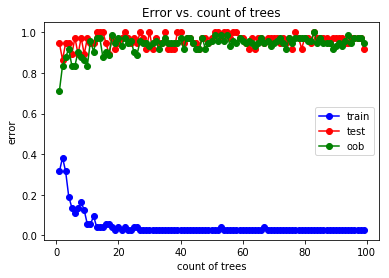

In [15]:
plt.plot(c_arr, train_err_RF, 'b-o', label = 'train')
plt.plot(c_arr, test_err_RF, 'r-o', label = 'test')
plt.plot(c_arr, oob_err_RF, 'g-o', label = 'oob')
plt.title('Error vs. count of trees')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [16]:
min_train_err = np.min(train_err_RF)
min_test_err_RF = np.min(test_err_RF)
print(min_train_err, min_test_err_RF)

0.027397260274 0.864864864865


Недообучение не наблюдается, поскольку достигаются достаточно малые значения на обучающей выборке
Переобучение не наблюдается скорее всего, поскольку на графике ошибка на тестовой выборке колеблется от 0,8 до 1, но отсутствуют ее существенные скачки

# Extremely Random Trees

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

Массивы ошибок

In [18]:
test_err_ERF = []
train_err_ERF = []
oob_err_ERF = []

In [19]:
import warnings
warnings.filterwarnings('ignore')

for c in c_arr:
    ExtrRandomForest = ExtraTreesClassifier(n_estimators=c, bootstrap=True, oob_score = True)
    ExtrRandomForest.fit(X_train, y_train)
    
    y_train_pred = ExtrRandomForest.predict(X_train)
    y_test_pred = ExtrRandomForest.predict(X_test)
    
    train_err_ERF.append(np.mean(y_train != y_train_pred))
    test_err_ERF.append(np.mean(y_test != y_test_pred))
    
    oob_err_ERF.append(1 - ExtrRandomForest.oob_score_)

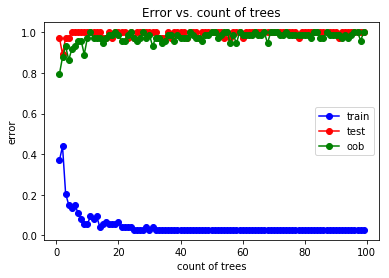

In [20]:
plt.plot(c_arr, train_err_ERF, 'b-o', label = 'train')
plt.plot(c_arr, test_err_ERF, 'r-o', label = 'test')
plt.plot(c_arr, oob_err_ERF, 'g-o', label = 'oob')
plt.title('Error vs. count of trees')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [21]:
min_train_err = np.min(train_err_ERF)
min_test_err_ERF = np.min(test_err_ERF)
print(min_train_err, min_test_err_ERF)

0.027397260274 0.891891891892


Недообучение не наблюдается, поскольку достигаются достаточно малые значения на обучающей выборке
Переобучение не наблюдается скорее всего, поскольку на графике ошибка на тестовой выборке колеблется от 0,92 до 1, но отсутствуют ее существенные скачки

# AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

Массивы ошибок

In [23]:
test_err_AB = []
train_err_AB = []
oob_err_AB = []

In [24]:
import warnings
warnings.filterwarnings('ignore')

for c in c_arr:
    AB = AdaBoostClassifier(n_estimators = c)
    AB.fit(X_train, y_train)
    
    y_train_pred = AB.predict(X_train)
    y_test_pred = AB.predict(X_test)
    
    train_err_AB.append(np.mean(y_train != y_train_pred))
    test_err_AB.append(np.mean(y_test != y_test_pred))

In [25]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.575342465753 0.864864864865


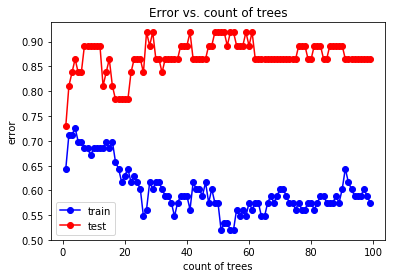

In [26]:
plt.plot(c_arr, train_err_AB, 'b-o', label = 'train')
plt.plot(c_arr, test_err_AB, 'r-o', label = 'test')
#plt.plot(c_arr, oob_err_AB, 'g-o', label = 'oob')
plt.title('Error vs. count of trees')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [27]:
min_train_err = np.min(train_err_AB)
min_test_err_AB = np.min(test_err_AB)
print(min_train_err, min_test_err_AB)

0.520547945205 0.72972972973


Недообучение наблюдается скорее всего, поскольку не достигаются достаточно малые значения на обучающей выборке

# Gradient Boosted Trees

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

Массивы ошибок

In [29]:
test_err_GBT = []
train_err_GBT = []
oob_err_GBT = []

In [30]:
import warnings
warnings.filterwarnings('ignore')

for c in c_arr:
    GBT = GradientBoostingClassifier(n_estimators=c)
    GBT.fit(X_train, y_train)
    
    y_train_pred = GBT.predict(X_train)
    y_test_pred = GBT.predict(X_test)
    
    train_err_GBT.append(np.mean(y_train != y_train_pred))
    test_err_GBT.append(np.mean(y_test != y_test_pred))

In [31]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.027397260274 0.675675675676


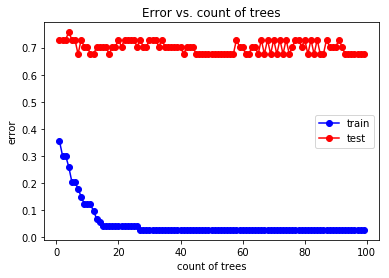

In [32]:
plt.plot(c_arr, train_err_GBT, 'b-o', label = 'train')
plt.plot(c_arr, test_err_GBT, 'r-o', label = 'test')
#plt.plot(c_arr, oob_err_GBT, 'g-o', label = 'oob')
plt.title('Error vs. count of trees')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [33]:
min_train_err = np.min(train_err_GBT)
min_test_err_GBT = np.min(test_err_GBT)
print(min_train_err, min_test_err_GBT)

0.027397260274 0.675675675676


Недообучение не наблюдается, поскольку достигаются достаточно малые значения на обучающей выборке
Переобучение не наблюдается скорее всего, поскольку на графике ошибка на тестовой выборке колеблется около значения 0,7 , но отсутствуют ее существенные скачки

Посмотрим на матрицу рассогласования

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[2 3 2 1 2]
 [2 3 0 2 1]
 [0 1 3 1 0]
 [0 1 3 2 3]
 [1 0 1 1 2]]


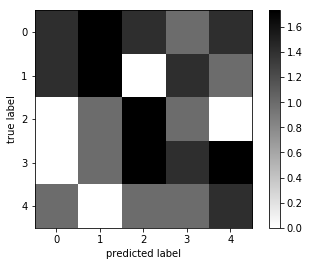

In [35]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Еще одна метрика качества:

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.20      0.40      0.27         5
          1       0.38      0.38      0.38         8
          2       0.60      0.33      0.43         9
          3       0.22      0.29      0.25         7
          4       0.40      0.25      0.31         8

avg / total       0.38      0.32      0.34        37



Сравним графики ошибки на тестовой выборке

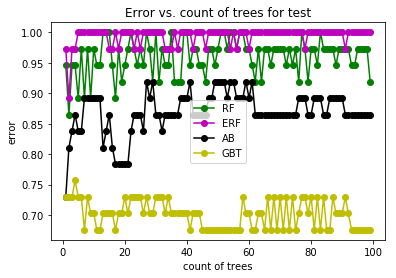

In [37]:
plt.plot(c_arr, test_err_RF, 'g-o', label = 'RF')
plt.plot(c_arr, test_err_ERF, 'm-o', label = 'ERF')
plt.plot(c_arr, test_err_AB, 'k-o', label = 'AB')
plt.plot(c_arr, test_err_GBT, 'y-o', label = 'GBT')

plt.title('Error vs. count of trees for test')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

In [38]:
print(min_test_err_RF, min_test_err_ERF, min_test_err_AB, min_test_err_GBT)

0.864864864865 0.891891891892 0.72972972973 0.675675675676


На основе полученных графиков можно утверждать, что алгоритмы на обучающей выборке имеют достаточно малую ошибку, на тестовой же имеют ошибку выше.
Cамые плохие показатели продемонстрировали Random Forest и Extremely Random Trees